# Data Cleaning

In [195]:
#import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
from sklearn.preprocessing import LabelEncoder
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [196]:
#import data
data=pd.read_csv("C:\\Users\\99451\\Downloads\\train.csv")

In [197]:
#show first ten row
data.head(10)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,...,NaN,NaN,NaN,NaN,NaN,40.118699,3.981105,21.012897,NaN,0.052871
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,...,NaN,NaN,NaN,NaN,NaN,12.984996,4.320539,NaN,NaN,0.052780
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.191899,NaN,NaN,0.062652
8,990025,Aquarius II,0.657402,61.337084,18231.029378,0.826377,15.173325,6.941815,0.725536,0.647240,...,NaN,NaN,NaN,NaN,NaN,-4.709357,6.151802,NaN,NaN,0.053927
9,990025,Andromeda XI,0.657180,62.554929,16196.125655,0.679096,12.937281,6.529242,0.561520,0.482450,...,NaN,NaN,NaN,NaN,NaN,8.731994,6.684401,NaN,NaN,0.050588


In [198]:
#describe data
data.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [199]:
#get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [200]:
#search null
data.isnull().sum()

galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
Gross income per capita                                                        28
                                                                             ... 
Adjusted net savings                                                         2953
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2924
Private galaxy capital flows (% of GGP)                                      2991
Gender Inequality Index (GII)                                                3021
y                                                                               0
Length: 80, dtype: int64

In [201]:
#show it with percent
round(data.isnull().sum() * 100 / len(data),2) 

galactic year                                                                 0.00
galaxy                                                                        0.00
existence expectancy index                                                    0.03
existence expectancy at birth                                                 0.03
Gross income per capita                                                       0.72
                                                                             ...  
Adjusted net savings                                                         76.40
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    75.65
Private galaxy capital flows (% of GGP)                                      77.39
Gender Inequality Index (GII)                                                78.16
y                                                                             0.00
Length: 80, dtype: float64

In [202]:
# Check the percentage of missing values for each column
missing_percent = data.isnull().mean() * 100

In [203]:
# Check the percentage of missing values for each column
missing_percent 

galactic year                                                                 0.000000
galaxy                                                                        0.000000
existence expectancy index                                                    0.025873
existence expectancy at birth                                                 0.025873
Gross income per capita                                                       0.724450
                                                                               ...    
Adjusted net savings                                                         76.403622
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    75.653299
Private galaxy capital flows (% of GGP)                                      77.386805
Gender Inequality Index (GII)                                                78.163001
y                                                                             0.000000
Length: 80, dtype: float64

In [204]:
# List columns with more than 50% missing values
columns_to_drop = missing_percent[missing_percent > 50].index

In [205]:
# Drop columns with more than 50% missing values
data.drop(columns=columns_to_drop, inplace=True)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 14 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   galactic year                                                3865 non-null   int64  
 1   galaxy                                                       3865 non-null   object 
 2   existence expectancy index                                   3864 non-null   float64
 3   existence expectancy at birth                                3864 non-null   float64
 4   Gross income per capita                                      3837 non-null   float64
 5   Income Index                                                 3837 non-null   float64
 6   Expected years of education (galactic years)                 3732 non-null   float64
 7   Mean years of education (galactic years)                     3502 non-null   f

In [207]:
data.isnull().sum()

galactic year                                                     0
galaxy                                                            0
existence expectancy index                                        1
existence expectancy at birth                                     1
Gross income per capita                                          28
Income Index                                                     28
Expected years of education (galactic years)                    133
Mean years of education (galactic years)                        363
Intergalactic Development Index (IDI)                           391
Education Index                                                 391
Intergalactic Development Index (IDI), Rank                     433
Population using at least basic drinking-water services (%)    1844
Population using at least basic sanitation services (%)        1850
y                                                                 0
dtype: int64

# Data Preprocessing

In [208]:
# Calculate the mean and median of the 'existence expectancy index' column
mean_value = data['existence expectancy index'].mean()
# Mean Imputation
data['existence expectancy index'].fillna(mean_value, inplace=True)

In [209]:
# Calculate the mean and median of the 'existence expectancy index' column
mean_value = data['existence expectancy at birth'].mean()
# Mean Imputation
data['existence expectancy at birth'].fillna(mean_value, inplace=True)

In [210]:
## Mean Imputation
mean_value = data['Gross income per capita'].mean()
data['Gross income per capita'].fillna(mean_value, inplace=True)

In [211]:
# Create a list of column names with missing values
columns_with_missing = ['Income Index', 'Expected years of education (galactic years)',
                        'Mean years of education (galactic years)', 'Intergalactic Development Index (IDI)',
                        'Education Index', 'Intergalactic Development Index (IDI), Rank',
                        'Population using at least basic drinking-water services (%)',
                        'Population using at least basic sanitation services (%)']

In [212]:
# Loop through each column and fill with its mode value
for col in columns_with_missing:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [213]:
data.isnull().sum()

galactic year                                                  0
galaxy                                                         0
existence expectancy index                                     0
existence expectancy at birth                                  0
Gross income per capita                                        0
Income Index                                                   0
Expected years of education (galactic years)                   0
Mean years of education (galactic years)                       0
Intergalactic Development Index (IDI)                          0
Education Index                                                0
Intergalactic Development Index (IDI), Rank                    0
Population using at least basic drinking-water services (%)    0
Population using at least basic sanitation services (%)        0
y                                                              0
dtype: int64

In [214]:
print(data.dtypes)

galactic year                                                    int64
galaxy                                                          object
existence expectancy index                                     float64
existence expectancy at birth                                  float64
Gross income per capita                                        float64
Income Index                                                   float64
Expected years of education (galactic years)                   float64
Mean years of education (galactic years)                       float64
Intergalactic Development Index (IDI)                          float64
Education Index                                                float64
Intergalactic Development Index (IDI), Rank                    float64
Population using at least basic drinking-water services (%)    float64
Population using at least basic sanitation services (%)        float64
y                                                              float64
dtype:

In [215]:
def clean_column_name(column_name):
    # Remove leading and trailing spaces
    column_name = column_name.strip()

    # Convert to lowercase
    column_name = column_name.lower()

    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')

    # Remove special characters using regex
    column_name = re.sub(r'[^a-zA-Z0-9_]', '', column_name)

    return column_name

In [216]:
# Get the list of column names
columns_list = data.columns.tolist()

In [217]:
# apply it to columns
for i, column_name in enumerate(columns_list):
    new_column_name = clean_column_name(column_name)
    data.rename(columns={column_name: new_column_name}, inplace=True)

In [218]:
print(data.dtypes)

galactic_year                                                int64
galaxy                                                      object
existence_expectancy_index                                 float64
existence_expectancy_at_birth                              float64
gross_income_per_capita                                    float64
income_index                                               float64
expected_years_of_education_galactic_years                 float64
mean_years_of_education_galactic_years                     float64
intergalactic_development_index_idi                        float64
education_index                                            float64
intergalactic_development_index_idi_rank                   float64
population_using_at_least_basic_drinkingwater_services_    float64
population_using_at_least_basic_sanitation_services_       float64
y                                                          float64
dtype: object


In [219]:
data['galaxy'] = data['galaxy'].astype('category')


In [220]:
# Perform label encoding to convert categories to numeric values
data['galaxy'] = data['galaxy'].cat.codes

In [221]:
print(data.dtypes)

galactic_year                                                int64
galaxy                                                       int16
existence_expectancy_index                                 float64
existence_expectancy_at_birth                              float64
gross_income_per_capita                                    float64
income_index                                               float64
expected_years_of_education_galactic_years                 float64
mean_years_of_education_galactic_years                     float64
intergalactic_development_index_idi                        float64
education_index                                            float64
intergalactic_development_index_idi_rank                   float64
population_using_at_least_basic_drinkingwater_services_    float64
population_using_at_least_basic_sanitation_services_       float64
y                                                          float64
dtype: object


# EDA (Exploratory Data Analysis)

In [222]:
data

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_galactic_years,mean_years_of_education_galactic_years,intergalactic_development_index_idi,education_index,intergalactic_development_index_idi_rank,population_using_at_least_basic_drinkingwater_services_,population_using_at_least_basic_sanitation_services_,y
0,990025,96,0.628657,63.125200,27109.234310,0.646039,8.240543,1.928166,0.273684,0.189874,9.925906,33.135967,10.609505,0.052590
1,990025,33,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,33.135967,10.609505,0.059868
2,990025,178,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,33.135967,10.609505,0.050449
3,990025,163,0.555862,52.333293,31633.240872,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,33.135967,10.609505,0.049394
4,990025,155,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,33.135967,10.609505,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,45,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,144.896214,116.585709,121.891775,0.042324
3861,1015056,99,0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,164.692000,121.672753,115.422812,0.036725
3862,1015056,34,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,63.726437,125.376956,114.907359,0.166271
3863,1015056,93,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,216.805701,105.345928,88.416415,0.024187


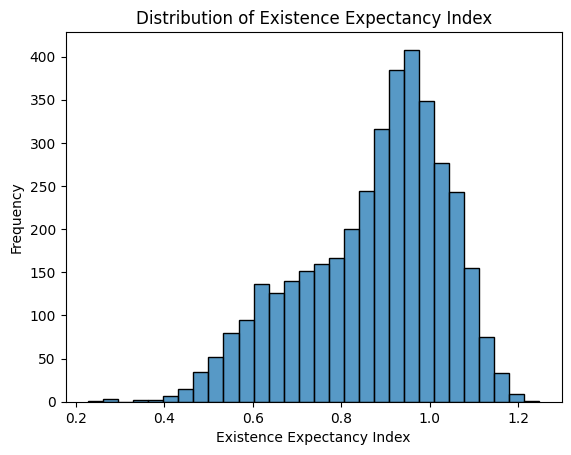

In [223]:
# Distribution of a numerical column
sns.histplot(data['existence_expectancy_index'], bins=30)
plt.title('Distribution of Existence Expectancy Index')
plt.xlabel('Existence Expectancy Index')
plt.ylabel('Frequency')
plt.show()

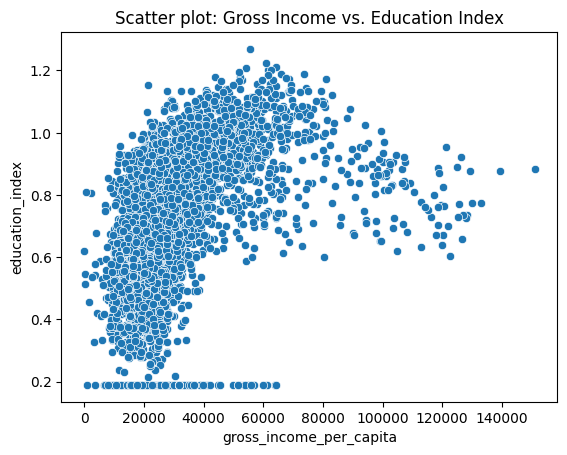

In [224]:
# Scatter plot between two numerical columns
sns.scatterplot(x='gross_income_per_capita', y='education_index', data=data)
plt.title('Scatter plot: Gross Income vs. Education Index')
plt.show()

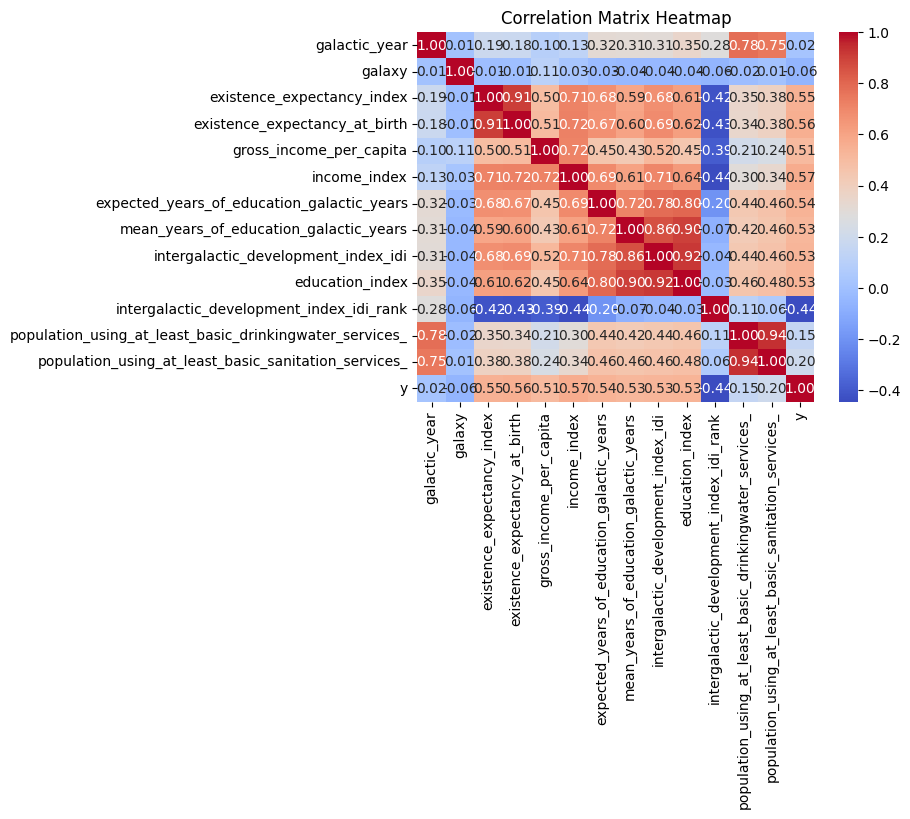

In [225]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Modelling

In [226]:
# Identify the index of the 'target' column
target_index = data.columns.get_loc('y')

#  Reorder the columns placing 'target' at the end
cols = list(data.columns)
cols.pop(target_index)
cols.append('y')

data = data[cols]

In [227]:
data

,galactic_year,galaxy,existence_expectancy_index,existence_expectancy_at_birth,gross_income_per_capita,income_index,expected_years_of_education_galactic_years,mean_years_of_education_galactic_years,intergalactic_development_index_idi,education_index,intergalactic_development_index_idi_rank,population_using_at_least_basic_drinkingwater_services_,population_using_at_least_basic_sanitation_services_,y
0,990025,96,0.628657,63.125200,27109.234310,0.646039,8.240543,1.928166,0.273684,0.189874,9.925906,33.135967,10.609505,0.052590
1,990025,33,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,33.135967,10.609505,0.059868
2,990025,178,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,33.135967,10.609505,0.050449
3,990025,163,0.555862,52.333293,31633.240872,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,33.135967,10.609505,0.049394
4,990025,155,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,33.135967,10.609505,0.154247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056,45,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,144.896214,116.585709,121.891775,0.042324
3861,1015056,99,0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,164.692000,121.672753,115.422812,0.036725
3862,1015056,34,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,63.726437,125.376956,114.907359,0.166271
3863,1015056,93,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,216.805701,105.345928,88.416415,0.024187


In [228]:
X = data.drop('y', axis=1)  # Replace 'target_variable_column' with the name of your target variable column
y = data['y']

In [229]:
#linearRegression model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train,y_train)
lin_model

y_pred=lin_model.predict(X_test)

#model results
R2=r2_score(y_test, y_pred)
print("R-Squared =", R2)
n=X_test.shape[0]
p=X_test.shape[1]
adj_R2=1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2 :', adj_R2)
MSE=mean_squared_error(y_test, y_pred)
print("MSE=", MSE)
RMSE=np.sqrt(MSE)
print("RMSE=", RMSE)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test, y_pred)
print("MAE=", MAE)

R-Squared = 0.5096134674493509
Adjusted R^2 : 0.501214225126349
MSE= 0.0018329346396392782
RMSE= 0.042812785936438176
MAE= 0.030564863433769136


#  Performance Evaluation

In [230]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model with alpha (regularization strength) set to 1
ridge_reg = Ridge(alpha=1)

In [231]:
# Fit the model to the training data
ridge_model = ridge_reg.fit(X_train, y_train)

In [232]:
# Get predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

In [233]:
# Calculate metrics for the Ridge model
R2_ridge = r2_score(y_test, y_pred_ridge)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)

In [234]:
print("R-Squared (Ridge):", R2_ridge)
print("MSE (Ridge):", MSE_ridge)
print("RMSE (Ridge):", RMSE_ridge)
print("MAE (Ridge):", MAE_ridge)

R-Squared (Ridge): 0.5099804329726962
MSE (Ridge): 0.0018315630199583815
RMSE (Ridge): 0.04279676412952715
MAE (Ridge): 0.030551286829184475


In [235]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try for Ridge regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [236]:
# Create a Ridge regression model
ridge_reg = Ridge()

In [237]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [238]:
# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

In [239]:
# Create a Ridge regression model with the best alpha value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [240]:

# Get predictions on the test data using the best model
y_pred_best_ridge = best_ridge_model.predict(X_test)

In [241]:
# Calculate metrics for the best Ridge model
R2_best_ridge = r2_score(y_test, y_pred_best_ridge)
MSE_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
RMSE_best_ridge = np.sqrt(MSE_best_ridge)
MAE_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)

In [242]:
print("Best Alpha:", best_alpha)
print("R-Squared (Best Ridge):", R2_best_ridge)
print("MSE (Best Ridge):", MSE_best_ridge)
print("RMSE (Best Ridge):", RMSE_best_ridge)
print("MAE (Best Ridge):", MAE_best_ridge)

Best Alpha: 1
R-Squared (Best Ridge): 0.5099804329726962
MSE (Best Ridge): 0.0018315630199583815
RMSE (Best Ridge): 0.04279676412952715
MAE (Best Ridge): 0.030551286829184475


In [243]:
# xgboost
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

In [244]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 50,
                        learning_rate=0.1,
                        max_depth=3,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_lambda=2,
                        reg_alpha=0.5,
                        min_child_weight=5,
                        gamma=0.1,
                        seed = 123)

In [245]:
# Fitting the model
xgb_r.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [246]:
# Predict the model
pred = xgb_r.predict(test_X)

In [247]:
# Assuming you have already defined 'test_y' and 'pred'
# Compute Mean Squared Error (MSE)
mse = np.mean((test_y - pred) ** 2)

In [248]:
# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(rmse)

0.03621814195048601


In [249]:
from sklearn.metrics import r2_score

In [250]:
r2 = r2_score(test_y, pred)
print("R-squared: %f" % r2)

R-squared: 0.693390


In [251]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [252]:
import h2o
from h2o.automl import H2OAutoML

In [253]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,28 mins 42 secs
H2O_cluster_timezone:,Asia/Baku
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_99451_ngthe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.731 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [254]:
# data is in a pandas DataFrame called 'data'
h2o_df = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [255]:
target_col = 'y'
feature_cols = data.columns.drop(target_col).tolist()

In [256]:
train, valid = h2o_df.split_frame(ratios=[0.8], seed=42)

In [257]:
aml = H2OAutoML(max_runtime_secs=30)  # Adjust max_runtime_secs 
aml.train(x=feature_cols, y=target_col, training_frame=train, validation_frame=valid)

AutoML progress: |█
12:18:46.268: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
12:18:46.272: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/9
# GBM base models (used / total),3/5
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [258]:
best_model = aml.leader

In [259]:
predictions = best_model.predict(valid)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [260]:
true_values = valid[target_col].as_data_frame().values.flatten()
predicted_values = predictions.as_data_frame().values.flatten()

rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.0206091053872972


# Test Data

In [261]:
#load test data
test_data = pd.read_csv("C:\\Users\\99451\\Downloads\\test.csv") 

In [262]:
#show first ten row
test_data.head(10)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,...,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN
5,1012036,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.589654,66.588119,14004.867808,0.724970,11.918349,4.147414,0.563767,0.491936,...,6.977606,0.544702,0.596934,0.908325,207.299284,221.329252,3.855441,4.795060,21.326042,0.857619
6,1011030,Reticulum III,0.589852,65.929589,13188.133433,0.618425,11.225966,5.264255,0.658853,0.406619,...,6.282756,0.568230,0.546635,0.857415,192.772606,196.917085,NaN,4.697520,NaN,NaN
7,1009020,KK98 77,0.594438,59.766365,10395.817571,0.563009,11.756748,9.914050,0.662800,0.675582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1007012,KKR 25,0.598516,61.178249,24639.661929,0.791240,11.389803,8.200359,0.691245,0.723380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1010025,KK98 77,0.598777,63.967935,29450.026633,0.624785,11.061482,10.699379,0.667834,0.668096,...,14.655061,0.718743,0.644739,1.036328,182.976850,185.591733,5.360955,19.973755,15.733135,0.821365


In [267]:
# Check the percentage of missing values for each column
missing_percent = test_data.isnull().mean() * 100

# Check the percentage of missing values for each column
missing_percent

# List columns with more than 50% missing values
columns_to_drop = missing_percent[missing_percent > 50].index

# Drop columns with more than 50% missing values
test_data.drop(columns=columns_to_drop, inplace=True)

# Calculate the mean and median of the 'existence expectancy index' column
mean_value = test_data['existence expectancy index'].mean()
# Mean Imputation
test_data['existence expectancy index'].fillna(mean_value, inplace=True)

# Calculate the mean and median of the 'existence expectancy index' column
mean_value = test_data['existence expectancy at birth'].mean()
# Mean Imputation
test_data['existence expectancy at birth'].fillna(mean_value, inplace=True)

## Mean Imputation
mean_value = test_data['Gross income per capita'].mean()
test_data['Gross income per capita'].fillna(mean_value, inplace=True)

# Create a list of column names with missing values
columns_with_missing = ['Income Index', 'Expected years of education (galactic years)',
                        'Mean years of education (galactic years)', 'Intergalactic Development Index (IDI)',
                        'Education Index', 'Intergalactic Development Index (IDI), Rank',
                        'Population using at least basic drinking-water services (%)',
                        'Population using at least basic sanitation services (%)']

# Loop through each column and fill with its mode value
for col in columns_with_missing:
    mode_value = test_data[col].mode()[0]
    test_data[col].fillna(mode_value, inplace=True)
    

    
def clean_column_name(column_name):
    # Remove leading and trailing spaces
    column_name = column_name.strip()

    # Convert to lowercase
    column_name = column_name.lower()

    # Replace spaces with underscores
    column_name = column_name.replace(' ', '_')

    # Remove special characters using regex
    column_name = re.sub(r'[^a-zA-Z0-9_]', '', column_name)

    return column_name

# Get the list of column names
columns_list = test_data.columns.tolist()


# apply it to columns
for i, column_name in enumerate(columns_list):
    new_column_name = clean_column_name(column_name)
    test_data.rename(columns={column_name: new_column_name}, inplace=True)
    
test_data['galaxy'] = test_data['galaxy'].astype('category')

# Perform label encoding to convert categories to numeric values
test_data['galaxy'] = test_data['galaxy'].cat.codes

print(test_data.dtypes)

galactic_year                                                int64
galaxy                                                       int16
existence_expectancy_index                                 float64
existence_expectancy_at_birth                              float64
gross_income_per_capita                                    float64
income_index                                               float64
expected_years_of_education_galactic_years                 float64
mean_years_of_education_galactic_years                     float64
intergalactic_development_index_idi                        float64
education_index                                            float64
intergalactic_development_index_idi_rank                   float64
population_using_at_least_basic_drinkingwater_services_    float64
population_using_at_least_basic_sanitation_services_       float64
dtype: object


In [272]:
y_pred_test = lin_model.predict(test_data)

In [273]:
# linear regression model using the entire available dataset (X, y)
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X, y)

In [274]:
# Now you can make predictions on the test_data
y_pred_test = lin_model.predict(test_data)

In [275]:
# Model results
R2 = r2_score(y_test, y_pred)
print("R-Squared =", R2)

R-Squared = 0.5096134674493509


In [276]:
n = X_test.shape[0]
p = X_test.shape[1]

In [277]:
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)
print('Adjusted R^2:', adj_R2)

Adjusted R^2: 0.5023360417379827


In [278]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE =", MSE)

MSE = 0.0018329346396392782


In [279]:
RMSE = np.sqrt(MSE)
print("RMSE =", RMSE)

RMSE = 0.042812785936438176
